<a href="https://colab.research.google.com/github/Ankur099IIT/CNN-in-tensorflow--Course-2-Deeplearning.ai/blob/main/Multi_class_classifier_Rock%2C_Paper%2C_Scissors_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download Training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip

--2022-04-30 10:37:09--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.148.128, 209.85.200.128, 74.125.129.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.148.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip.1’

rps.zip.1           100%[===================>] 191.38M   182MB/s    in 1.1s    

2022-04-30 10:37:10 (182 MB/s) - ‘rps.zip.1’ saved [200682221/200682221]



In [2]:
# Download Test set

!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2022-04-30 10:37:10--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 142.250.159.128, 74.125.132.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.zip’

rps-test-set.zip    100%[===================>]  28.15M   163MB/s    in 0.2s    

2022-04-30 10:37:11 (163 MB/s) - ‘rps-test-set.zip’ saved [29516758/29516758]



In [7]:
import zipfile

zip_ref = zipfile.ZipFile('/content/rps.zip', 'r')
zip_ref.extractall('/tmp/rps-train')
zip_ref.close()

zip_ref = zipfile.ZipFile('/content/rps-test-set.zip', 'r')
zip_ref.extractall('/tmp/rps-test')
zip_ref.close()

In [9]:
import os

base_dir = '/tmp/rps-train/rps'

train_paper_dir = os.path.join(base_dir, 'paper')
train_rock_dir = os.path.join(base_dir, 'rock')
train_scissors_dir = os.path.join(base_dir, 'scissors')

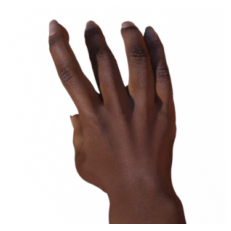

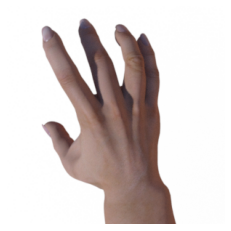

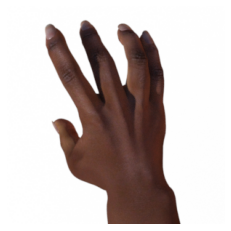

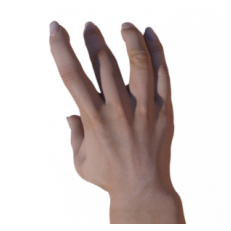

In [13]:
# Show some of the images from the training paper directories

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for files in (os.listdir(train_paper_dir))[:4]:
  image = mpimg.imread(os.path.join(train_paper_dir, files))
  plt.imshow(image)
  plt.axis('Off')
  plt.show()




In [14]:
import tensorflow as tf

model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units = 512, activation = 'relu'),
        tf.keras.layers.Dense(3, activation = 'softmax')


])

In [15]:

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest'
                                   )

train_generator = train_datagen.flow_from_directory(directory = '/tmp/rps-train/rps',
                                                    target_size = (150,150),
                                                    batch_size = 126,
                                                    class_mode  = 'categorical')

validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)

validation_generator = validation_datagen.flow_from_directory(directory = '/tmp/rps-test/rps-test-set',
                                                              target_size = (150,150),
                                                              batch_size = 126,
                                                              class_mode  = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [20]:
history = model.fit(train_generator,
                    steps_per_epoch = 20,
                    epochs = 25,
                    validation_data = validation_generator,
                    validation_steps = 3,
                    verbose = 1)

Epoch 1/25
20/20 [==============================] - 40s 1s/step - loss: 1.3782 - accuracy: 0.3663 - val_loss: 1.0879 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 25s 1s/step - loss: 1.0911 - accuracy: 0.4250 - val_loss: 1.0583 - val_accuracy: 0.4355
Epoch 3/25
20/20 [==============================] - 25s 1s/step - loss: 0.9554 - accuracy: 0.5040 - val_loss: 0.4984 - val_accuracy: 0.8710
Epoch 4/25
20/20 [==============================] - 25s 1s/step - loss: 0.8638 - accuracy: 0.6083 - val_loss: 0.3599 - val_accuracy: 0.9677
Epoch 5/25
20/20 [==============================] - 25s 1s/step - loss: 0.7744 - accuracy: 0.6560 - val_loss: 0.4795 - val_accuracy: 0.6586
Epoch 6/25
20/20 [==============================] - 25s 1s/step - loss: 0.5989 - accuracy: 0.7298 - val_loss: 0.3704 - val_accuracy: 0.7500
Epoch 7/25
20/20 [==============================] - 27s 1s/step - loss: 0.5246 - accuracy: 0.7869 - val_loss: 0.2238 - val_accuracy: 0.8844
Epoch 8/25
20/20 [==

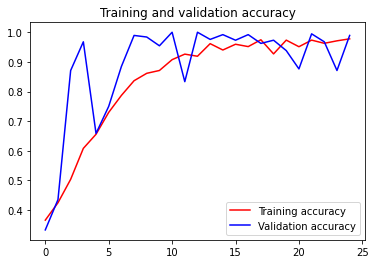

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()